In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import zipfile
import os
import numpy as np
from PIL import Image

# Unzipfile the give File

In [4]:
def extract_file(file_path):
    zipped = zipfile.ZipFile(file_path,'r')
    zipped.extractall('./')
    zipped.close()

extract_file('/content/drive/MyDrive/Assignment-5/cifar-3class-data.zip')

#Load Image Data and respective Labels



In [5]:
def Load_data(path):
    images = []
    labels = []
    for class_ in os.listdir(path):
        class_path = os.path.join(path,class_) # to join Class_i to path

        for img in os.listdir(class_path):
            img_path = os.path.join(class_path,img)
            image = Image.open(img_path)
            image = np.array(image)
            images.append(image)
            labels.append(int(class_[-1]))

    return np.array(images)/255.0 ,np.array(labels)

In [6]:
TRAIN_PATH = '/content/drive/MyDrive/Assignment-5/cifar-3class-data/train/'
TEST_PATH = '/content/drive/MyDrive/Assignment-5/cifar-3class-data/test/'

In [7]:
train,ytrain = Load_data(TRAIN_PATH)
test,ytest = Load_data(TEST_PATH)
len(train)

1510

# Plotting any 4 images


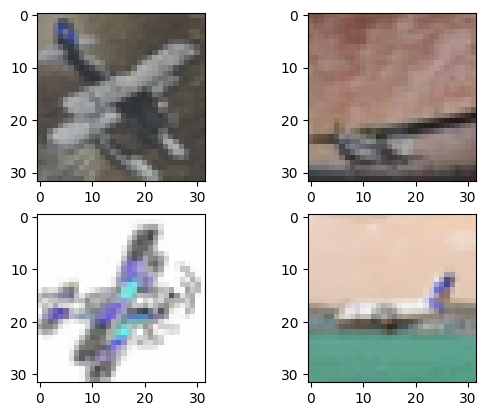

In [8]:
import matplotlib.pyplot as plt

figure, axis = plt.subplots(2, 2)

axis[0, 0].imshow(train[0])
axis[0, 1].imshow(train[1])
axis[1, 0].imshow(train[2])
axis[1, 1].imshow(train[3])

# Creating Validation data and Train data


In [ ]:
from sklearn.model_selection import train_test_split
train,validation,ytrain,y_valid = train_test_split(train,ytrain,test_size = 0.1,random_state=42)
print(len(train),len(validation))

1359 151


# Function To Flatten Image to feed into FCNN


In [ ]:
def flatten_img(data):
    temp = []
    for i in range(data.shape[0]):
        temp.append(list(data[i].flatten()))
    return np.array(temp)

In [ ]:
def flatten_img1(data):
    temp = []
    for m in range(data.shape[0]):
        flatten = []
        for i in range(data.shape[1]):
            for j in range(data.shape[2]):
                for k in range(data.shape[3]):
                    flatten.append(data[m][i][j][k])

        temp.append(flatten)
    return np.array(temp)

In [ ]:
train_trf = flatten_img1(train)
valid_trf = flatten_img1(validation)

# Fcnn

In [ ]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
def FCNN(xtrain,ytrain,xvalid,yvalid,epochs,batch_size):
    model = Sequential()
    model.add(Dense(256,activation='relu',input_shape = (32*32*3,)))
    model.add(Dense(128,activation='relu'))
    model.add(Dense(64,activation='relu'))
    model.add(Dense(3,activation='softmax')) # 3 output so as to get probability of test case to lie in all 3 classes
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    history = model.fit(xtrain,ytrain,validation_data=(xvalid,yvalid),batch_size=batch_size,epochs=epochs)

    return history,model

# Accuracy Analysis

In [ ]:
def Plot_Accuracy(history,xlen):
    plt.plot(np.arange(1,xlen+1),history.history['accuracy'],c = 'b',label = 'Accuracy')
    plt.plot(np.arange(1,xlen+1),history.history['val_accuracy'],c = 'r',label = 'Val-Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracies')
    plt.legend()
    plt.show()

In [ ]:
def Model_Accuracy(ytest,pred_y):
    wrong_count = 0
    for i in range(len(ytest)): wrong_count += (ytest[i] != pred_y[i])

    acc1 = round((len(ytest) - wrong_count)/len(ytest) * 100,2)

    print(f"Accuracy  = {acc1}%")

# Running The Model


In [ ]:
history,model = FCNN(train_trf,ytrain,valid_trf,y_valid,500,200)

Epoch 1/500
7/7 [==============================] - 2s 76ms/step - loss: 1.5902 - accuracy: 0.3164 - val_loss: 1.3441 - val_accuracy: 0.2980
Epoch 2/500
7/7 [==============================] - 0s 52ms/step - loss: 1.0642 - accuracy: 0.4297 - val_loss: 0.9803 - val_accuracy: 0.4702
Epoch 3/500
7/7 [==============================] - 0s 35ms/step - loss: 0.9541 - accuracy: 0.5710 - val_loss: 0.9850 - val_accuracy: 0.5762
Epoch 4/500
7/7 [==============================] - 0s 31ms/step - loss: 0.9000 - accuracy: 0.5960 - val_loss: 0.8832 - val_accuracy: 0.5828
Epoch 5/500
7/7 [==============================] - 0s 62ms/step - loss: 0.8513 - accuracy: 0.6144 - val_loss: 0.8507 - val_accuracy: 0.6490
Epoch 6/500
7/7 [==============================] - 0s 56ms/step - loss: 0.8066 - accuracy: 0.6637 - val_loss: 0.8348 - val_accuracy: 0.6358
Epoch 7/500
7/7 [==============================] - 0s 51ms/step - loss: 0.7982 - accuracy: 0.6615 - val_loss: 0.8081 - val_accuracy: 0.6490
Epoch 8/500
7/7 [===

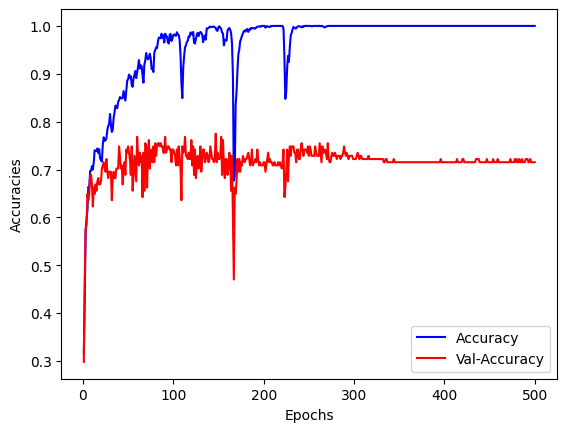

In [ ]:
Plot_Accuracy(history,500)

# Prediction


In [ ]:
test_trf = flatten_img1(test)

In [ ]:
pred = model.predict(test_trf)

10/10 [==============================] - 0s 6ms/step


In [ ]:
pred_y = [np.where(pred[i] == max(pred[i]))[0][0] for i in range(pred.shape[0])]

In [ ]:
Model_Accuracy(pred_y,ytest)

Accuracy  = 75.67%


In [ ]:
loss = model.evaluate(test_trf,ytest)[0]

10/10 [==============================] - 0s 8ms/step - loss: 2.3675 - accuracy: 0.7567


In [ ]:
loss

2.367523670196533

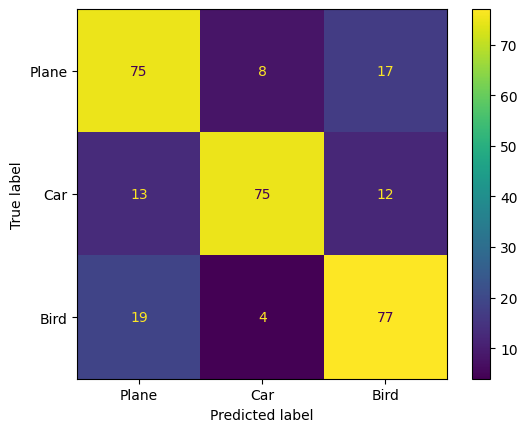

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
CM = confusion_matrix(ytest,pred_y)
ConfusionMatrixDisplay(CM,display_labels=['Plane','Car','Bird']).plot()

## cnn


In [ ]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten
def CNN(xtrain,ytrain,xvalid,yvalid,epochs,batch_size):
    model = Sequential()
    model.add(Conv2D(64,(3,3),input_shape = (32,32,3),padding='same',activation='relu'))
    model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
    model.add(MaxPooling2D((2,2),padding='valid'))

    model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
    model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
    model.add(MaxPooling2D((2,2),padding='valid'))

    model.add(Flatten())

    model.add(Dense(512,activation='relu'))
    model.add(Dense(100,activation='relu'))

    model.add(Dense(3,activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    history = model.fit(xtrain,ytrain,validation_data=(xvalid,yvalid),batch_size=batch_size,epochs=epochs)

    return history,model

In [ ]:
validation.shape

(151, 32, 32, 3)

## Running The CNN Model

In [ ]:
history_CNN,model = CNN(train,ytrain,validation,y_valid,50,200)

Epoch 1/50
7/7 [==============================] - 30s 4s/step - loss: 1.1170 - accuracy: 0.3481 - val_loss: 1.0724 - val_accuracy: 0.5364
Epoch 2/50
7/7 [==============================] - 26s 3s/step - loss: 1.0338 - accuracy: 0.4525 - val_loss: 0.9418 - val_accuracy: 0.6291
Epoch 3/50
7/7 [==============================] - 24s 4s/step - loss: 0.8551 - accuracy: 0.6534 - val_loss: 1.0652 - val_accuracy: 0.4901
Epoch 4/50
7/7 [==============================] - 25s 4s/step - loss: 0.8415 - accuracy: 0.6284 - val_loss: 0.7969 - val_accuracy: 0.7086
Epoch 5/50
7/7 [==============================] - 26s 3s/step - loss: 0.7582 - accuracy: 0.7130 - val_loss: 0.7086 - val_accuracy: 0.7152
Epoch 6/50
7/7 [==============================] - 23s 3s/step - loss: 0.6175 - accuracy: 0.7469 - val_loss: 0.6600 - val_accuracy: 0.7285
Epoch 7/50
7/7 [==============================] - 26s 4s/step - loss: 0.5705 - accuracy: 0.7712 - val_loss: 0.7576 - val_accuracy: 0.6954
Epoch 8/50
7/7 [==================

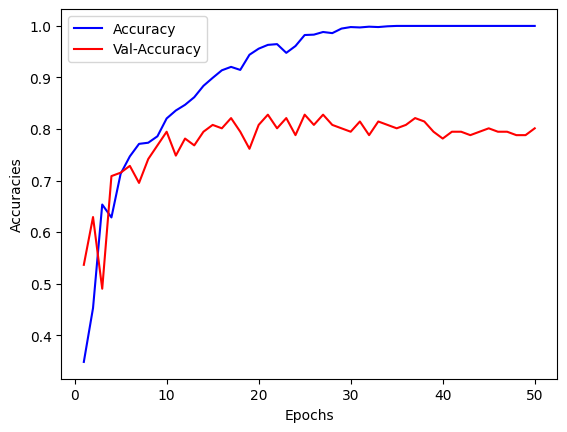

In [ ]:
Plot_Accuracy(history_CNN,50)

In [ ]:
pred = model.predict(test)

10/10 [==============================] - 2s 211ms/step


# Prediction

In [ ]:
print(pred.shape)
pred

(300, 3)


array([[8.06441844e-01, 9.32837502e-05, 1.93464860e-01],
       [7.66560357e-11, 4.71138363e-12, 9.99999940e-01],
       [2.93404310e-06, 4.16296893e-11, 9.99996960e-01],
       [3.34977478e-01, 4.42947554e-11, 6.65022492e-01],
       [7.45983422e-01, 3.45543108e-11, 2.54016578e-01],
       [3.36569357e-12, 1.99627730e-15, 9.99999940e-01],
       [8.34280478e-10, 9.17224630e-12, 9.99999940e-01],
       [2.33491810e-04, 5.82675685e-10, 9.99766588e-01],
       [4.64510620e-02, 5.47010937e-10, 9.53548968e-01],
       [2.77315532e-10, 7.25252081e-09, 9.99999940e-01],
       [9.98133481e-01, 1.83003792e-03, 3.65471788e-05],
       [4.14122295e-12, 2.17388833e-06, 9.99997795e-01],
       [8.20704453e-13, 1.30116373e-09, 9.99999940e-01],
       [5.44926081e-07, 5.51072642e-12, 9.99999344e-01],
       [2.02477987e-12, 5.24671018e-13, 9.99999940e-01],
       [3.31501775e-12, 1.33602724e-13, 9.99999940e-01],
       [4.04165901e-09, 2.82002557e-13, 9.99999940e-01],
       [1.70631518e-14, 1.55764

In [ ]:
pred_y_CNN = [np.where(pred[i] == max(pred[i]))[0][0] for i in range(pred.shape[0])]

In [ ]:
Model_Accuracy(pred_y_CNN,ytest)

Accuracy  = 83.33%


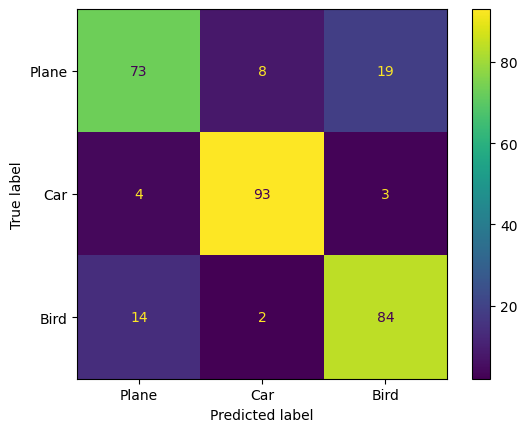

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
CM = confusion_matrix(ytest,pred_y_CNN)
ConfusionMatrixDisplay(CM,display_labels=['Plane','Car','Bird']).plot()